## **DTS Data Science**
# Institut Teknologi Sepuluh Nopember (Kelas B)


## **CHALLENGE 3**

## **Nutrition Facts for McDonald's Menu**

**Introduction**

Ray Kroc wanted to build a restaurant system that would be famous for providing food of cosistently high quality and uniform methods of preparation. He wanted to serve burgers, buns, fries and beverages that tasted just the same in Alaska as they did in Alabama. To achieve this, he chose a unique path: persuading both franchisees and suppliers to buy into his vision, working not for McDonald's but for themselves, together with McDonald's. Many of McDonald's most famous menu item's - Like Big Mac, Filet-O-Fish, and Egg McMuffin were created by franchisees

**Nutrition Facts for McDonald's Menu Dataset** provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.



# Klasifikasi menggunakan K-Neirst Neighbor

In [ ]:
import itertools
import numpy as np
from matplotlib.ticker import NullFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

Membaca Data

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving menu.csv to menu.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['menu.csv']))
df

,Category,Item,Serving Size,Calories,Calories_from_Fat,Total_Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


Pelabelan berdasarkan Category

In [ ]:
df['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

Didapati bahwa:
Category             Jumlah Data
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6

Histogram sebaran data Carbohydrates

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9065002940>]],
      dtype=object)

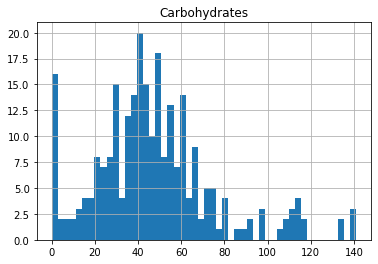

In [ ]:
df.hist(column='Carbohydrates', bins=50)

Pemilihan feature set

In [ ]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories_from_Fat',
       'Total_Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

Feature yang dipilih ['Calories', 'Calories from Fat','Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat','Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol','Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)','Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber','Dietary Fiber (% Daily Value)', 'Sugars', 'Protein','Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)','Calcium (% Daily Value)', 'Iron (% Daily Value)']

Konversi Pandas Data frame ke array numpy agar bisa digunakan di scikit-learn library

In [ ]:
X = df[['Calories', 'Calories_from_Fat','Total_Fat', 'Total Fat (% Daily Value)', 'Saturated Fat','Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol','Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)','Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber','Dietary Fiber (% Daily Value)', 'Sugars', 'Protein','Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)','Calcium (% Daily Value)', 'Iron (% Daily Value)']] .values #astype(float)
X[0:5]

array([[300., 120.,  13.,  20.,   5.,  25.,   0., 260.,  87., 750.,  31.,
         31.,  10.,   4.,  17.,   3.,  17.,  10.,   0.,  25.,  15.],
       [250.,  70.,   8.,  12.,   3.,  15.,   0.,  25.,   8., 770.,  32.,
         30.,  10.,   4.,  17.,   3.,  18.,   6.,   0.,  25.,   8.],
       [370., 200.,  23.,  35.,   8.,  42.,   0.,  45.,  15., 780.,  33.,
         29.,  10.,   4.,  17.,   2.,  14.,   8.,   0.,  25.,  10.],
       [450., 250.,  28.,  43.,  10.,  52.,   0., 285.,  95., 860.,  36.,
         30.,  10.,   4.,  17.,   2.,  21.,  15.,   0.,  30.,  15.],
       [400., 210.,  23.,  35.,   8.,  42.,   0.,  50.,  16., 880.,  37.,
         30.,  10.,   4.,  17.,   2.,  21.,   6.,   0.,  25.,  10.]])

In [ ]:
y = df['Category'].values
y[0:5]

array(['Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast'],
      dtype=object)

Normalisasi Data

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.28468361, -0.05559952, -0.0821929 , -0.08311032, -0.18971436,
        -0.18675333, -0.47593486,  2.35424457,  2.3628775 ,  0.44147095,
         0.43033103, -0.57969508, -0.61488307,  1.51417637,  1.66312459,
        -0.92309014,  0.32107066, -0.1409127 , -0.32457391,  0.23705644,
         0.83448094],
       [-0.49318428, -0.44735768, -0.43483572, -0.44935918, -0.56624669,
        -0.56286384, -0.47593486, -0.34376431, -0.35791541,  0.47619826,
         0.47201735, -0.61515878, -0.61488307,  1.51417637,  1.66312459,
        -0.92309014,  0.40875802, -0.30538992, -0.32457391,  0.23705644,
         0.0304813 ],
       [ 0.00721733,  0.57121352,  0.62309274,  0.6036063 ,  0.37508412,
         0.45263453, -0.47593486, -0.11414653, -0.11683249,  0.49356191,
         0.51370366, -0.65062248, -0.61488307,  1.51417637,  1.66312459,
        -0.95802514,  0.05800856, -0.22315131, -0.32457391,  0.23705644,
         0.26019549],
       [ 0.3408184 ,  0.96297168,  0.97573556,  0.96985516

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (208, 21) (208,)
Test set: (52, 21) (52,)


Klsifikasi KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training data dengan k=1

In [ ]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predicting

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Smoothies & Shakes', 'Breakfast', 'Coffee & Tea', 'Coffee & Tea',
       'Coffee & Tea'], dtype=object)

Evaluasi Akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9855769230769231
Test set Accuracy:  0.8653846153846154


Mencari nilai K optimum

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.86538462, 0.84615385, 0.82692308, 0.80769231, 0.86538462,
       0.86538462, 0.84615385, 0.75      , 0.75      ])

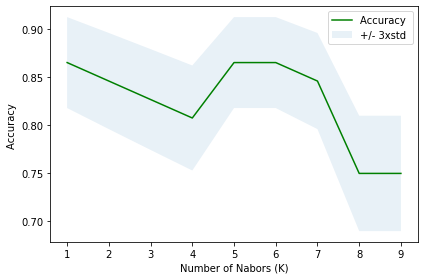

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8653846153846154 with k= 1


Jacard Index Test

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.75

F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7446886446886446

Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

TypeError: ignored

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Coffee & Tea','Breakfast''Smoothies & Shakes','Chicken & Fish','Beverages','Beef & Pork','Snacks & Sides','Desserts','Salads'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))


NameError: ignored

Confusion matrix, without normalization
[[16  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  3  1  0  0]
 [ 1  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1]]


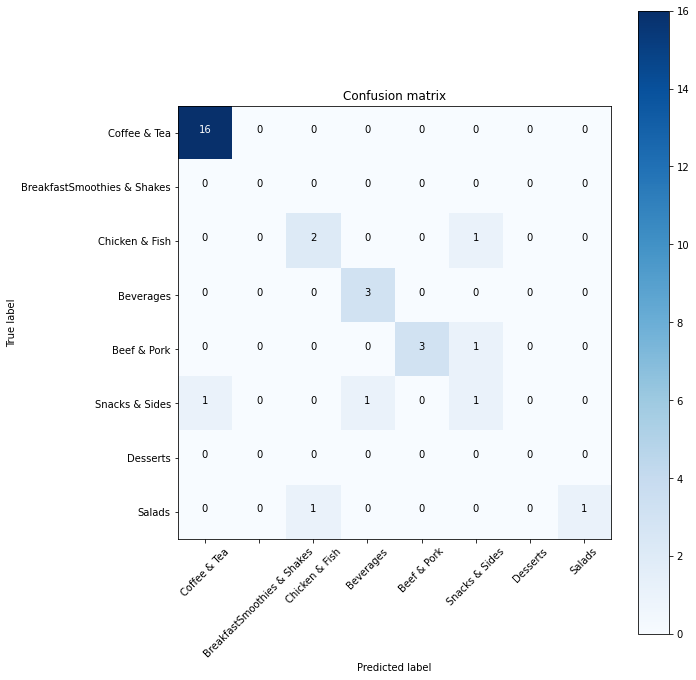

In [ ]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=['Coffee & Tea','Breakfast''Smoothies & Shakes','Chicken & Fish','Beverages','Beef & Pork','Snacks & Sides','Desserts','Salads'],normalize= False,  title='Confusion matrix')

True Positif = 26

Cross validation Test

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
modelknn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scoring = 'accuracy'
scoreknn = cross_val_score(modelknn, X, y, cv=kfold, n_jobs=1, scoring=scoring)
print(scoreknn)

NameError: ignored

In [ ]:
np.mean(scoreknn)

0.8115384615384615